In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

renewables_df = pd.read_csv('renewable-share-energy.csv')
co2_per_capita_df = pd.read_csv('consumption-co2-per-capita.csv')
co2_absolute_df = pd.read_csv('consumption-co2-emissions.csv')
population_growth_df = pd.read_csv('population-and-demography.csv')
population_df = pd.read_csv('population.csv')

years = range(1990, 2021)

# Data Cleaning & Visualizing

In [2]:
# Countries that have data in 1990 and 2020 in both datasets
renewables_1990 = renewables_df[renewables_df['Year'] == 1990]['Entity']
co2_1990 = co2_absolute_df[co2_absolute_df['Year'] == 1990]['Entity']

renewables_2020 = renewables_df[renewables_df['Year'] == 2020]['Entity']
co2_2020 = co2_absolute_df[co2_absolute_df['Year'] == 2020]['Entity']

countries_1990 = set(renewables_1990).intersection(co2_1990)
countries_2020 = set(renewables_2020).intersection(co2_2020)

countries_both_years = countries_1990.intersection(countries_2020)

non_country_entities = [
    'High-income countries', 'South America', 'Europe', 'Oceania', 'Africa',
    'Lower-middle-income countries', 'Upper-middle-income countries', 'World',
    'North America', 'European Union (27)', 'Asia'
]

filtered_countries = set(countries_both_years) - set(non_country_entities)

sorted_filtered_countries = sorted(filtered_countries)

# print(sorted_filtered_countries)

In [13]:
def get_renewables(renewables_df, data_selection):
    return renewables_df[(renewables_df['Entity'] == data_selection) & 
                            (renewables_df['Year'] >= 1990) & 
                            (renewables_df['Year'] <= 2020)][['Year', 'Renewables (% equivalent primary energy)']].reset_index(drop=True)

def get_co2_per_capita(co2_per_capita_df, data_selection):
    return co2_per_capita_df[(co2_per_capita_df['Entity'] == data_selection) & 
                            (co2_per_capita_df['Year'] >= 1990) & 
                            (co2_per_capita_df['Year'] <= 2020)][['Year', 'Per capita consumption-based CO₂ emissions']].reset_index(drop=True)

def get_co2_absolute(co2_absolute_df, data_selection):
    return co2_absolute_df[(co2_absolute_df['Entity'] == data_selection) & 
                            (co2_absolute_df['Year'] >= 1990) & 
                            (co2_absolute_df['Year'] <= 2020)][['Year', 'Annual consumption-based CO₂ emissions']].reset_index(drop=True)

def get_population_growth(population_growth_df, data_selection):
    return population_growth_df[(population_growth_df['Country name'] == data_selection) & 
                            (population_growth_df['Year'] >= 1990) & 
                            (population_growth_df['Year'] <= 2020)]['Population growth rate'].tolist()

def get_population(population_df, data_selection):
    return population_df[(population_df['Entity'] == data_selection) & 
                            (population_df['Year'] >= 1990) & 
                            (population_df['Year'] <= 2020)]['Population (historical estimates)'].tolist()

In [4]:
def plot_double_axis(years, lst1, lst1_label, lst2, lst2_label, data_selection):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(years, lst1, marker='o', color='tab:blue')
    ax1.set_xlabel('Year')
    ax1.set_ylabel(lst1_label, color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.grid(True)
    
    ax2 = ax1.twinx()  
    ax2.plot(years, lst2, marker='o', color='tab:green')
    ax2.set_ylabel(lst2_label, color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    plt.title(f'{lst1_label} and {lst2_label} over time ({data_selection})')

    plt.show()

# Renewables vs CO2

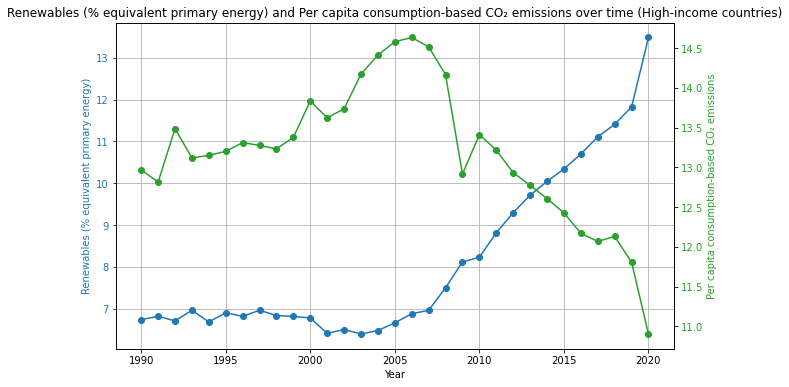

In [5]:
renewables_high_income = get_renewables(renewables_df, 'High-income countries')
co2_high_income = get_co2_per_capita(co2_per_capita_df, 'High-income countries')

# renewables_upper_midle = get_renewables(renewables_df, 'Upper-middle-income countries')
# co2_upper_midle = get_co2_per_capita(co2_per_capita_df, 'Upper-middle-income countries')

# renewables_lower_midle = get_renewables(renewables_df, 'Lower-middle-income countries')
# co2_lower_midle = get_co2_per_capita(co2_per_capita_df, 'Lower-middle-income countries')

plot_double_axis(years, renewables_high_income, 'Renewables (% equivalent primary energy)', co2_high_income, 'Per capita consumption-based CO₂ emissions', 'High-income countries')
# plot_double_axis(years, renewables_upper_midle, 'Renewables (% equivalent primary energy)', co2_high_income, 'Per capita consumption-based CO₂ emissions', 'Upper-middle-income countries')
# plot_double_axis(years, renewables_lower_midle, 'Renewables (% equivalent primary energy)', co2_high_income, 'Per capita consumption-based CO₂ emissions', 'Lower-middle-income countries')

# Population vs CO2

## Population growth

In [6]:
population_growth_high_income = get_population_growth(population_growth_df, 'High-income countries')
co2_absolute_high_income = get_co2_absolute(co2_absolute_df, 'High-income countries')

population_growth_united_states = get_population_growth(population_growth_df, 'United States')
co2_absolute_united_states = get_co2_absolute(co2_absolute_df, 'United States')

population_growth_china = get_population_growth(population_growth_df, 'China')
co2_absolute_china = get_co2_absolute(co2_absolute_df, 'China')

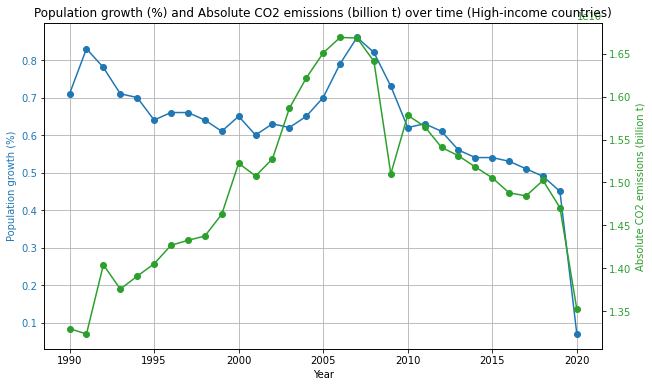

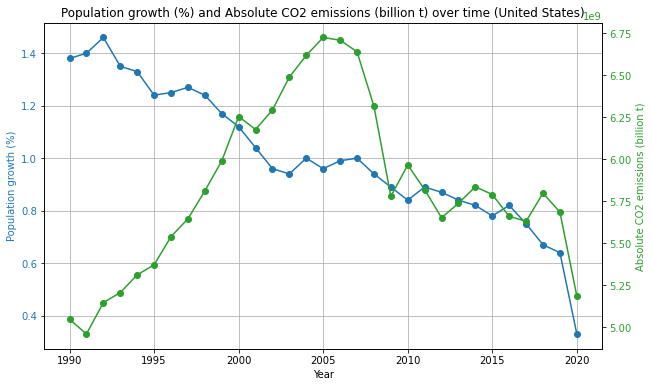

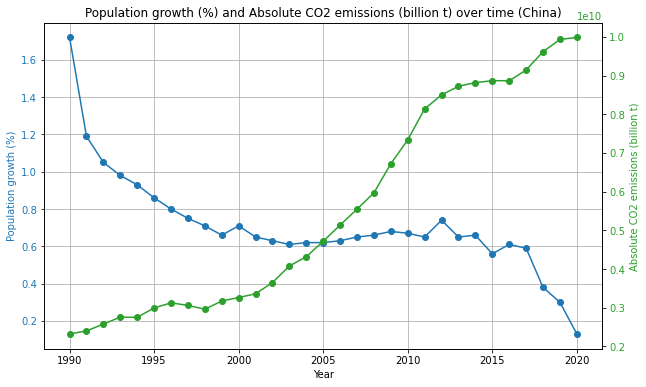

In [7]:
plot_double_axis(years, population_growth_high_income, 'Population growth (%)', co2_absolute_high_income, 'Absolute CO2 emissions (billion t)', 'High-income countries')
plot_double_axis(years, population_growth_united_states, 'Population growth (%)', co2_absolute_united_states, 'Absolute CO2 emissions (billion t)', 'United States')
plot_double_axis(years, population_growth_china, 'Population growth (%)', co2_absolute_china, 'Absolute CO2 emissions (billion t)', 'China')

## Population

In [8]:
population_high_income = get_population(population_df, 'High-income countries')
co2_absolute_high_income = get_co2_absolute(co2_absolute_df, 'High-income countries')

population_united_states = get_population(population_df, 'United States')
co2_absolute_united_states = get_co2_absolute(co2_absolute_df, 'United States')

population_china = get_population(population_df, 'China')
co2_absolute_china = get_co2_absolute(co2_absolute_df, 'China')

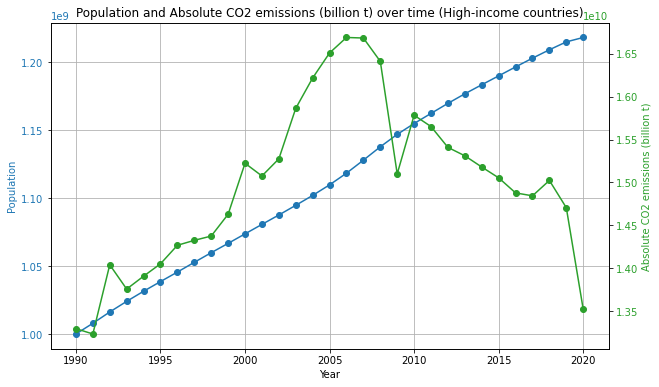

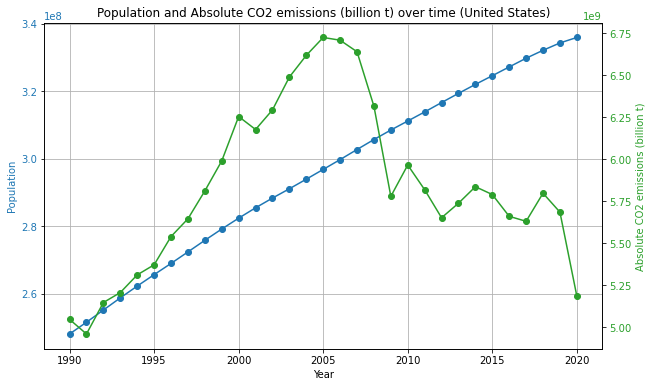

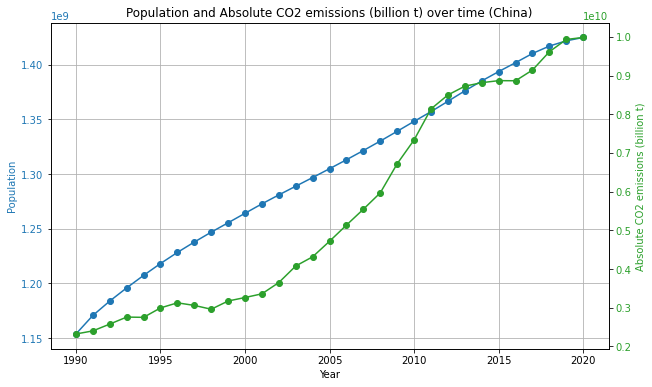

In [9]:
plot_double_axis(years, population_high_income, 'Population', co2_absolute_high_income, 'Absolute CO2 emissions (billion t)', 'High-income countries')
plot_double_axis(years, population_united_states, 'Population', co2_absolute_united_states, 'Absolute CO2 emissions (billion t)', 'United States')
plot_double_axis(years, population_china, 'Population', co2_absolute_china, 'Absolute CO2 emissions (billion t)', 'China')

# Per Capita CO2 VS Absolute CO2

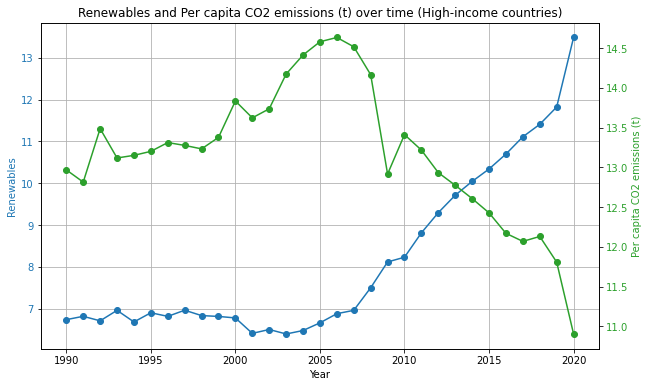

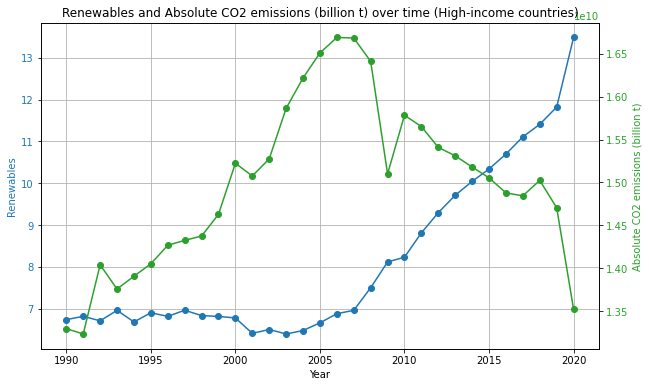

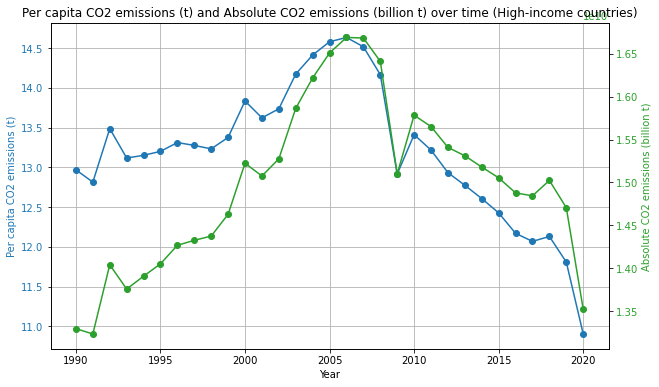

In [10]:
renewables_high_income = get_renewables(renewables_df, 'High-income countries')
co2_per_capita_high_income = get_co2_per_capita(co2_per_capita_df, 'High-income countries')
co2_absolute_high_income = get_co2_absolute(co2_absolute_df, 'High-income countries')
population_high_income = get_population_growth(population_growth_df, 'High-income countries')

plot_double_axis(years, renewables_high_income, 'Renewables', co2_per_capita_high_income, 'Per capita CO2 emissions (t)', 'High-income countries')
plot_double_axis(years, renewables_high_income, 'Renewables', co2_absolute_high_income, 'Absolute CO2 emissions (billion t)', 'High-income countries')
plot_double_axis(years, co2_per_capita_high_income, 'Per capita CO2 emissions (t)', co2_absolute_high_income, 'Absolute CO2 emissions (billion t)', 'High-income countries')

# Renewables & Population growth VS Absolute CO2

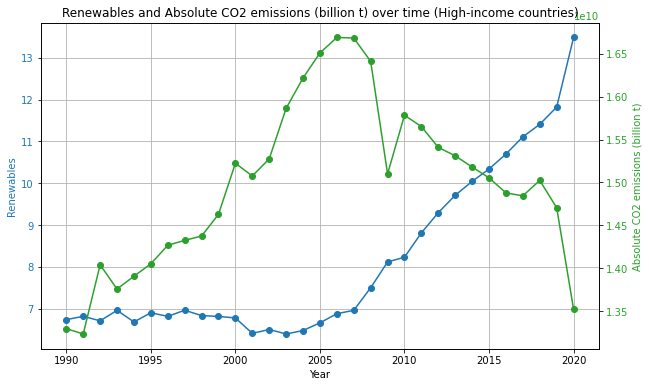

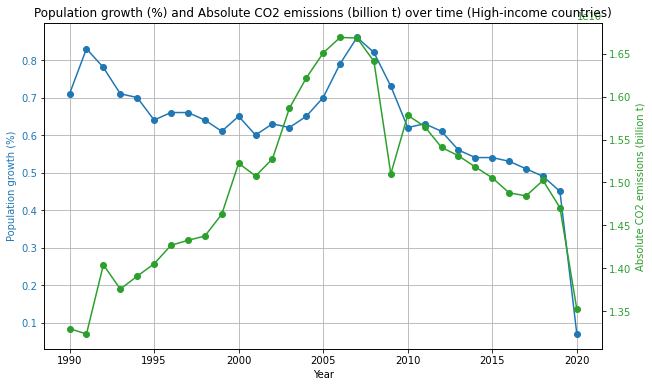

In [11]:
plot_double_axis(years, renewables_high_income, 'Renewables', co2_absolute_high_income, 'Absolute CO2 emissions (billion t)', 'High-income countries')
plot_double_axis(years, population_high_income, 'Population growth (%)', co2_absolute_high_income, 'Absolute CO2 emissions (billion t)', 'High-income countries')

# R1: Renewables VS CO2

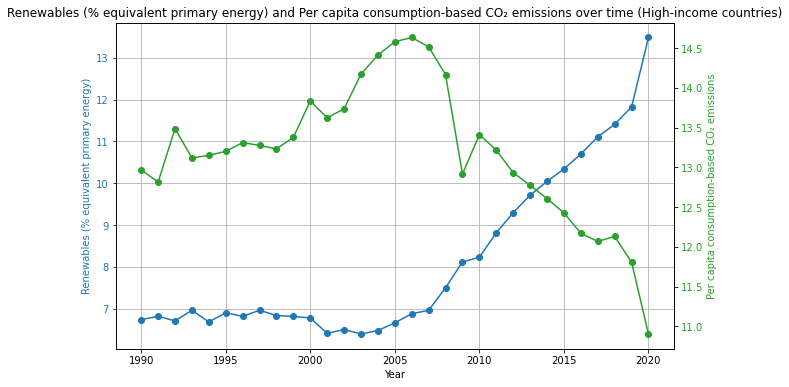

In [27]:
renewables_high_income_df = get_renewables(renewables_df, 'High-income countries')
co2_absolute_high_income_df = get_co2_absolute(co2_absolute_df, 'High-income countries')
co2_per_capita_high_income_df = get_co2_per_capita(co2_per_capita_df, 'High-income countries')

co2_absolute_high_income = co2_absolute_high_income_df['Annual consumption-based CO₂ emissions'].tolist()
co2_per_capita_high_income = co2_per_capita_high_income_df['Per capita consumption-based CO₂ emissions'].tolist()
renewables_high_income = renewables_high_income_df['Renewables (% equivalent primary energy)'].tolist()

# plot_double_axis(years, renewables_high_income, 'Renewables (% equivalent primary energy)', co2_absolute_high_income, 'Consumption-based CO₂ emissions', 'High-income countries')
plot_double_axis(years, renewables_high_income, 'Renewables (% equivalent primary energy)', co2_per_capita_high_income, 'Per capita consumption-based CO₂ emissions', 'High-income countries')

## Make stationary

## Granger Causality

In [28]:
from statsmodels.tsa.stattools import grangercausalitytests

# https://www.machinelearningplus.com/time-series/granger-causality-test-in-python/
def grangers_causation_matrix(data, variables, maxlag, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [29]:
# Absolute CO2
# co2_absolute_high_income = co2_absolute_high_income_df['Annual consumption-based CO₂ emissions']
# renewables_high_income = renewables_high_income_df['Renewables (% equivalent primary energy)']

# granger_df = pd.DataFrame({'CO2': co2_absolute_high_income, 'Renewables': renewables_high_income})
# granger_test_results = grangercausalitytests(granger_df, maxlag=4, verbose=True)

# grangers_causation_matrix(granger_df, granger_df.columns, 4)


# Per capita CO2
co2_per_capita_high_income = co2_per_capita_high_income_df['Per capita consumption-based CO₂ emissions']
renewables_high_income = renewables_high_income_df['Renewables (% equivalent primary energy)']

granger_df = pd.DataFrame({'CO2': co2_per_capita_high_income, 'Renewables': renewables_high_income})
granger_test_results = grangercausalitytests(granger_df, maxlag=4, verbose=True)

grangers_causation_matrix(granger_df, granger_df.columns, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.6643 , p=0.0020  , df_denom=27, df_num=1
ssr based chi2 test:   chi2=12.9604 , p=0.0003  , df=1
likelihood ratio test: chi2=10.7724 , p=0.0010  , df=1
parameter F test:         F=11.6643 , p=0.0020  , df_denom=27, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.5592  , p=0.0053  , df_denom=24, df_num=2
ssr based chi2 test:   chi2=15.8513 , p=0.0004  , df=2
likelihood ratio test: chi2=12.6456 , p=0.0018  , df=2
parameter F test:         F=6.5592  , p=0.0053  , df_denom=24, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7877  , p=0.0658  , df_denom=21, df_num=3
ssr based chi2 test:   chi2=11.1507 , p=0.0109  , df=3
likelihood ratio test: chi2=9.3860  , p=0.0246  , df=3
parameter F test:         F=2.7877  , p=0.0658  , df_denom=21, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.2797  , p=0.1007  , df_d

,CO2_x,Renewables_x
CO2_y,1.0000,0.0003
Renewables_y,0.0385,1.0000


## LRM

There seems to be a linear relationship between renewables and CO2 emissions from 2003, the year where the year-over-year increase in renewables started.

In [30]:
import statsmodels.api as sm

In [31]:
# co2_absolute_high_income = co2_absolute_high_income_df['Annual consumption-based CO₂ emissions']
co2_per_capita_high_income = co2_per_capita_high_income_df['Per capita consumption-based CO₂ emissions']
renewables_high_income = renewables_high_income_df['Renewables (% equivalent primary energy)']

# Defining the dependent and independent variables
X = renewables_high_income
# Y = co2_absolute_high_income
Y = co2_per_capita_high_income

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building and fitting the model
model = sm.OLS(Y, X).fit()

# Getting the summary of the model
# print(model.summary())

C:\Users\Ricov\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Intercept: 16.159807404543333
Slope: -0.3651201617042812


TypeError: unsupported operand type(s) for +: 'int' and 'list'

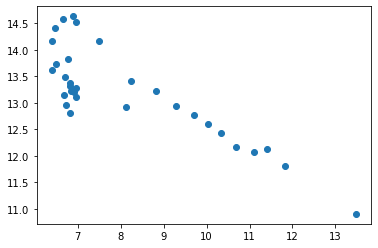

In [32]:
intercept, slope = model.params

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

plt.scatter(X['Renewables (% equivalent primary energy)'].tolist(), Y.tolist())

regression_line = int(intercept) + int(slope) * X['Renewables (% equivalent primary energy)'].tolist()
plt.plot(X, regression_line, color='red')

plt.xlabel('Renewable Energy')
plt.ylabel('CO2 Emissions')
plt.legend()

plt.show()

In [34]:
# co2_absolute_high_income_2003 = co2_absolute_high_income_df[co2_absolute_high_income_df['Year'] >= 2003]['Annual consumption-based CO₂ emissions']
co2_per_capita_high_income_2003 = co2_per_capita_high_income_df[co2_per_capita_high_income_df['Year'] >= 2003]['Per capita consumption-based CO₂ emissions']
renewables_high_income_2003 = renewables_high_income_df[renewables_high_income_df['Year'] >= 2003]['Renewables (% equivalent primary energy)']

# Defining the dependent and independent variables
X = renewables_high_income_2003
# Y = co2_absolute_high_income_2003
Y = co2_per_capita_high_income_2003

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building and fitting the model
model = sm.OLS(Y, X).fit()

# Getting the summary of the model
# print(model.summary())

C:\Users\Ricov\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Intercept: 17.77774469688122
Slope: -0.5132555151475582


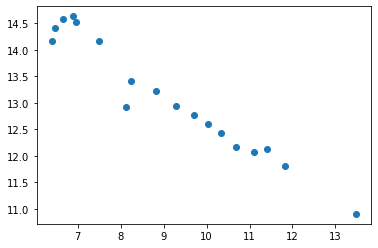

In [35]:
intercept, slope = model.params

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

plt.scatter(X['Renewables (% equivalent primary energy)'].tolist(), Y.tolist())
plt.show()

## Spearman

In [37]:
from scipy.stats import spearmanr

In [38]:
# co2_absolute_high_income = co2_absolute_high_income_df['Annual consumption-based CO₂ emissions']
co2_per_capita_high_income = co2_per_capita_high_income_df['Per capita consumption-based CO₂ emissions']
renewables_high_income = renewables_high_income_df['Renewables (% equivalent primary energy)']

spearman_corr, spearman_p_value = spearmanr(renewables_high_income, co2_per_capita_high_income)

spearman_corr, spearman_p_value

(-0.7576612903225807, 8.004659024244058e-07)

## Pearson

In [40]:
from scipy.stats import pearsonr

In [41]:
# co2_absolute_high_income = co2_absolute_high_income_df['Annual consumption-based CO₂ emissions']
co2_per_capita_high_income = co2_per_capita_high_income_df['Per capita consumption-based CO₂ emissions']
renewables_high_income = renewables_high_income_df['Renewables (% equivalent primary energy)']

pearson_corr, pearson_p_value = pearsonr(renewables_high_income, co2_per_capita_high_income)

pearson_corr, pearson_p_value

(-0.8373333635359312, 4.293989763326385e-09)

# R5: Forecasting

Renewables independant variable \
CO2 dependant variable

In [44]:
print(co2_per_capita_high_income.tolist())

[12.968296, 12.814567, 13.486894, 13.117765, 13.150878, 13.201154, 13.311502, 13.2759, 13.232059, 13.376555, 13.83443, 13.622228, 13.736093, 14.1728735, 14.412168, 14.578959, 14.632975, 14.515872, 14.1652, 12.915914, 13.411194, 13.2169485, 12.933134, 12.774454, 12.60743, 12.427668, 12.170347, 12.069143, 12.131171, 11.808604, 10.905033]
